In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno
from sklearn.metrics import r2_score

In [54]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [55]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


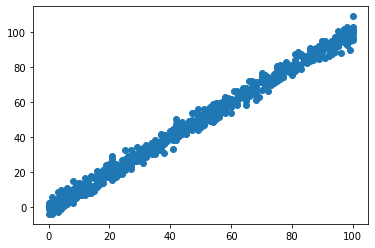

In [56]:
plt.scatter(train.x,train.y)

In [57]:
new_df = train[train['y'].isnull()]

In [58]:
new_df

,x,y
213,3530.157369,NaN


In [59]:
data.shape

(700, 2)

In [64]:
train['y'] = train.groupby("x").transform(lambda x:x.fillna(x.mean()))

In [67]:
train[train['y'].isnull()]

,x,y
213,3530.157369,NaN


In [80]:
train = train.dropna()
test = test.dropna()

In [89]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
x    699 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 16.4 KB


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB


In [120]:
X_train = np.array(train['x']).reshape(-1,1)
y_train = np.array(train['y']).reshape(-1,1)
X_test = np.array(test['x']).reshape(-1,1)
y_test = np.array(test['y']).reshape(-1,1)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
reg = LinearRegression()

In [123]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
y_pred = reg.predict(x_test)

In [125]:
r2_score(y_pred,y_test)

0.9883666162358453

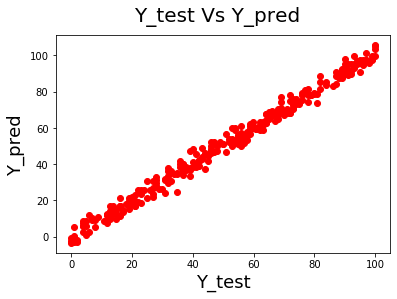

In [126]:
fig = plt.figure()
plt.scatter(y_pred,y_test,color='red')
fig.suptitle('Y_test Vs Y_pred',fontsize=20)
plt.xlabel('Y_test',fontsize=18)
plt.ylabel('Y_pred',fontsize=18)
plt.show()

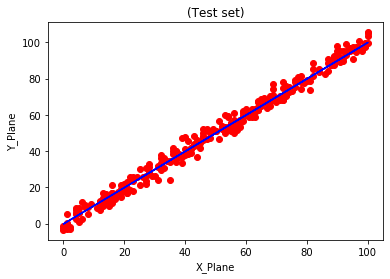

In [128]:
fig = plt.figure()
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title('(Test set)')
plt.xlabel('X_Plane')
plt.ylabel('Y_Plane')
plt.show()